In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

In [2]:
df=pd.read_csv('telecom_users.csv')

In [3]:
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [5]:
#We can notice that there are some objects,int and float

In [6]:
#Lets See the Numerical data.

In [7]:
num_data=df.select_dtypes(include=np.number)

In [8]:
cat_data=df.select_dtypes(exclude=np.number)

In [9]:
num_data.head()

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges
0,1869,0,72,24.10
1,4528,0,44,88.15
2,6344,1,38,74.95
3,6739,0,4,55.90
4,432,0,2,53.45


In [10]:
#From the num data we can notice that there is feature with name Unnamed: 0.Which is not appropriate wth respect
#to our data,So we have to drop that

In [11]:
cat_data.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,7010-BRBUU,Male,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),1734.65,No
1,9688-YGXVR,Female,No,No,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),3973.2,No
2,9286-DOJGF,Female,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),2869.85,Yes
3,6994-KERXL,Male,No,No,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,238.5,No
4,2181-UAESM,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,119.5,No


In [12]:
#In cat data we can see that there is feature customerId which is not gonna add significance to the model,
#so we have to drop that feature as well!!
#The total charges features in the cat data is in numerical format but its in the categorical data set.So we have
#change the data type to float

<AxesSubplot:xlabel='gender'>

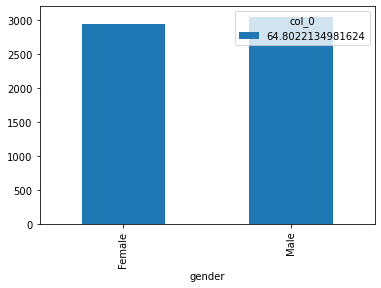

In [13]:
pd.crosstab(df['gender'],df['MonthlyCharges'].mean()).plot(kind='bar')

In [14]:
#Mean Monthly charges of Male is slightly higher when compared with female.

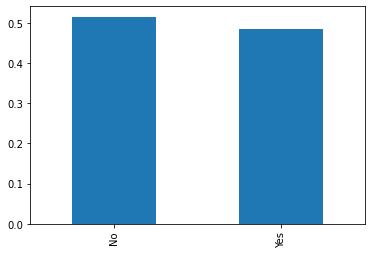

In [15]:
cat_data['Partner'].value_counts(normalize=True).plot(kind='bar')
plt.show()

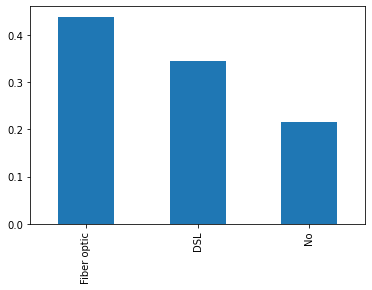

In [16]:
cat_data['InternetService'].value_counts(normalize=True).plot(kind='bar')
plt.show()

In [17]:
#The First Majority goes for the Fiber Optics
#The Second Majority goes for the DSL
#The Third Majority goes for no services

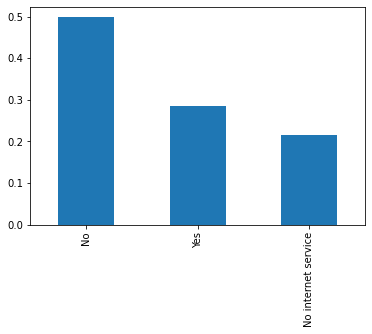

In [18]:
cat_data['OnlineSecurity'].value_counts(normalize=True).plot(kind='bar')
plt.show()

In [19]:
#The Top Majority of people dont opt for the Online Security
#The Second Majority of people opt for Online Security
#And here comes the no service people in the third majority

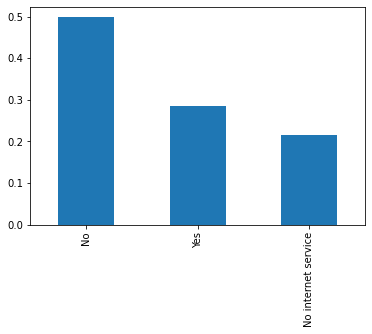

In [20]:
cat_data['OnlineSecurity'].value_counts(normalize=True).plot(kind='bar')
plt.show()

In [21]:
#The Top Majority of people dont opt for the Online Security
#The Second Majority of people opt for Online Security
#And here comes the no service people in the third majority

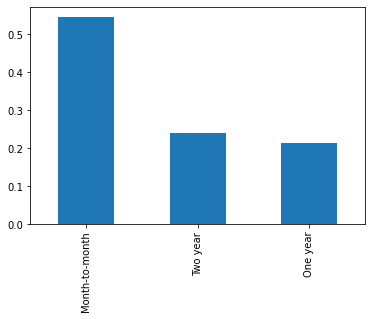

In [22]:
cat_data['Contract'].value_counts(normalize=True).plot(kind='bar')
plt.show()

In [23]:
#Most of the people opt for the month to month contract type
#The Second Majority of people opt for two year contract type
#The Third Majority of people opt for one year contract type

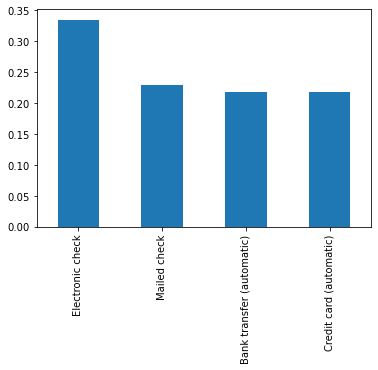

In [24]:
cat_data['PaymentMethod'].value_counts(normalize=True,ascending=False).plot(kind='bar')
plt.show()

In [25]:
#Majority of people pay by electronic check
#Second Majority of people pay by mailed check
#Third Majority of People pay using Bank Transfer
#Fourth Majority of people pay using Credit Card

In [26]:
pd.crosstab(df['Churn'],df['gender'])

gender,Female,Male
Churn,,
No,2145,2254
Yes,791,796


<AxesSubplot:xlabel='Churn'>

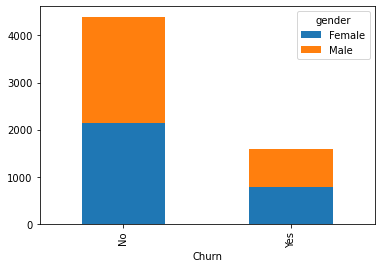

In [27]:
pd.crosstab(df['Churn'],df['gender']).plot(kind='bar',stacked=True)

In [28]:
#We have 2145 Female Customer with No Churn and 2254 Male customer with No Churn
#We have 791 Female Customer with Churn and 796 Male customer with  Churn

In [29]:
pd.crosstab(df['Churn'],df['MultipleLines'])

MultipleLines,No,No phone service,Yes
Churn,,,
No,2133,441,1825
Yes,715,149,723


In [30]:
#We can see that 2133 customers without multiple line ,with 441 customer with no phone service,1825 with multiple line will not churn
#715 customer with no multiple line,149 customers with no phone serivce,723 customer with multiple line will churn.

<AxesSubplot:xlabel='Churn'>

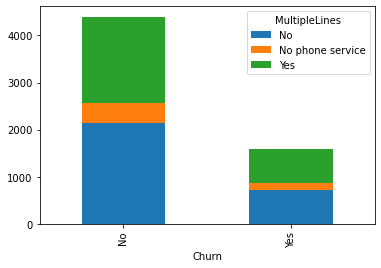

In [31]:
pd.crosstab(df['Churn'],df['MultipleLines']).plot(kind='bar',stacked=True)

<AxesSubplot:xlabel='Churn'>

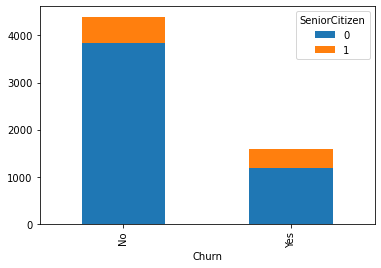

In [32]:
pd.crosstab(df['Churn'],df['SeniorCitizen']).plot(kind='bar',stacked=True)

In [33]:
df.groupby('PaymentMethod')['MonthlyCharges'].median()

PaymentMethod
Bank transfer (automatic)    74.025
Credit card (automatic)      73.150
Electronic check             80.600
Mailed check                 34.250
Name: MonthlyCharges, dtype: float64

<AxesSubplot:xlabel='PaymentMethod'>

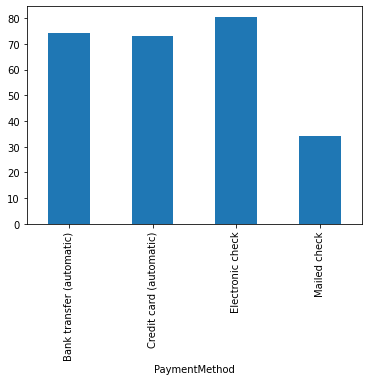

In [34]:
df.groupby('PaymentMethod')['MonthlyCharges'].median().plot(kind='bar')

In [35]:
df.groupby('PaymentMethod')['MonthlyCharges'].mean()

PaymentMethod
Bank transfer (automatic)    67.635054
Credit card (automatic)      66.416539
Electronic check             76.257328
Mailed check                 43.773886
Name: MonthlyCharges, dtype: float64

<AxesSubplot:xlabel='PaymentMethod'>

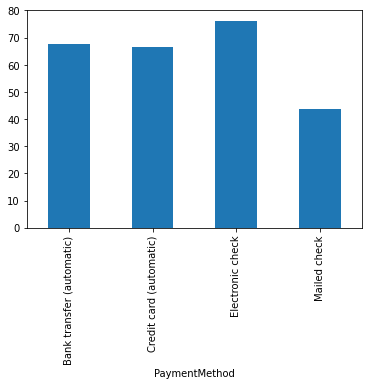

In [36]:
df.groupby('PaymentMethod')['MonthlyCharges'].mean().plot(kind='bar')

In [37]:
#The Second preffered way of payment is Mailed check.But mean/median amount of MonthlyCharges is the least among all
#We can infer that only less amount transaction is happening on the mailed check 

In [38]:
df=df.drop(['Unnamed: 0','customerID'],1)

In [39]:
df['gender']=df['gender'].replace('Male',1)
df['gender']=df['gender'].replace('Female',0)

In [40]:
df=df.replace('Yes',1)
df=df.replace('No',0)
df=df.replace('No internet service',2)
df=df.replace('No phone service',3)

In [41]:
df['InternetService']=df['InternetService'].replace('Fiber optic',2)
df['InternetService']=df['InternetService'].replace('DSL',1)

In [42]:
df['TotalCharges']=df['TotalCharges'].replace(' ',np.nan)

In [43]:
df['TotalCharges']=df['TotalCharges'].astype('float64')

In [44]:
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].median())

In [45]:
dummi=pd.get_dummies(df[['Contract','PaymentMethod']])

In [46]:
df2=df.drop(['Contract','PaymentMethod'],1)

In [47]:
cot=pd.concat([df2,dummi],1)

In [48]:
cot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   5986 non-null   int64  
 1   SeniorCitizen                            5986 non-null   int64  
 2   Partner                                  5986 non-null   int64  
 3   Dependents                               5986 non-null   int64  
 4   tenure                                   5986 non-null   int64  
 5   PhoneService                             5986 non-null   int64  
 6   MultipleLines                            5986 non-null   int64  
 7   InternetService                          5986 non-null   int64  
 8   OnlineSecurity                           5986 non-null   int64  
 9   OnlineBackup                             5986 non-null   int64  
 10  DeviceProtection                         5986 no

In [49]:
x=cot.drop('Churn',1)
y=cot['Churn']

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score,KFold

In [51]:
clf1 = DecisionTreeClassifier(random_state=0)
clf2 = KNeighborsClassifier(n_neighbors=5)

In [52]:
bagging1 = BaggingClassifier(base_estimator=clf1, n_estimators=21, max_samples=0.8,oob_score=True, random_state=0)
bagging2 = BaggingClassifier(base_estimator=clf2, n_estimators=11, max_samples=0.8,oob_score=True, random_state=0)

In [53]:
kf=KFold(n_splits=5,shuffle=True,random_state=0)
from sklearn.metrics import make_scorer,f1_score

scorer=make_scorer(f1_score,average='weighted')

score1 = cross_val_score(clf1, x, y, cv=kf, scoring=scorer)
score2 = cross_val_score(bagging1,x, y, cv=kf, scoring=scorer)
score3 = cross_val_score(bagging2,x, y, cv=kf, scoring=scorer)

C:\Users\RUSHI\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:638: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\RUSHI\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:642: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = (predictions /
C:\Users\RUSHI\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:638: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\RUSHI\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:642: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = (predictions /
C:\Users\RUSHI\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:638: UserWarning: Some inputs do not have OOB scores. This

In [54]:
np.mean(score1), np.std(score1)

(0.7268516917279488, 0.011286008907529729)

In [55]:
np.mean(score2), np.std(score2)

(0.7752246801904461, 0.010154541288625304)

In [56]:
np.mean(score3), np.std(score3)

(0.7498698660281282, 0.009820293396949533)

In [57]:
from sklearn.ensemble import AdaBoostClassifier
weak_learner=DecisionTreeClassifier(max_depth=1,random_state=0)

In [58]:
boosting = AdaBoostClassifier(base_estimator=weak_learner, n_estimators=20,random_state=0)

In [59]:
score_bost = cross_val_score(boosting, x, y, cv=kf, scoring='f1')

In [60]:
np.mean(score_bost), np.std(score_bost)

(0.5813542467335097, 0.017308715653837313)

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

In [62]:
gboost=GradientBoostingClassifier()

In [63]:
score_gbost = cross_val_score(gboost, x, y, cv=kf, scoring='f1')

In [64]:
np.mean(score_gbost),np.std(score_gbost)

(0.5825263200946041, 0.015350081022026464)

In [65]:
from xgboost  import XGBClassifier
from sklearn.model_selection import cross_val_score

In [66]:
xgboost=XGBClassifier()
score_xgbost = cross_val_score(xgboost, x, y, cv=kf, scoring='f1')
np.mean(score_xgbost),np.std(score_xgbost)

C:\Users\RUSHI\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:22:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:22:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:22:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:22:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

(0.5518729845258638, 0.03166528694291627)

In [67]:
clf1 = LogisticRegression(max_iter=3000)
clf2 = KNeighborsClassifier(n_neighbors=5) 
clf3=  RandomForestClassifier(random_state=0)
clf4= GaussianNB()
clf5=XGBClassifier(random_state=0)

In [68]:
from sklearn.ensemble import VotingClassifier
estimator=[('lr',LogisticRegression(max_iter=3000)),('KNN',KNeighborsClassifier()),('rf',RandomForestClassifier()),('nb',GaussianNB()),
          ('xb',XGBClassifier())]

In [69]:
vot1=VotingClassifier(estimators=estimator, voting='hard')
vot2=VotingClassifier(estimators=estimator, voting='soft')

In [70]:
for i,j in zip([clf1,clf2,clf3,clf4,clf5,vot1,vot2],['LR','KNN','RF','GNB','XG','Vote_hard','Vote_soft']):
    score_vot = cross_val_score(i, x, y, cv=kf, scoring='accuracy')
    print(j,np.mean(score_vot),np.std(score_vot))

LR 0.7941820327111602 0.014663956563513644
KNN 0.758104777804277 0.013888078073832542
RF 0.7931846868144206 0.00786703367409037
GNB 0.7081531039619081 0.007889774760390397
[19:22:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\RUSHI\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:22:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:22:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:22:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:22:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\RUSHI\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:22:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\RUSHI\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:22:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\RUSHI\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:22:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\RUSHI\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:22:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\RUSHI\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:22:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Vote_hard 0.7953548311513342 0.005725083187928106


C:\Users\RUSHI\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:22:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\RUSHI\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:22:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\RUSHI\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:22:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\RUSHI\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:22:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\RUSHI\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:22:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Vote_soft 0.7875042363839482 0.007537161458357447


In [71]:
from sklearn.ensemble import StackingClassifier

In [72]:
estimator=[('lr',LogisticRegression(max_iter=3000)),('rf',RandomForestClassifier())]

In [73]:
sclf = StackingClassifier(estimators=estimator, final_estimator= RandomForestClassifier())

In [74]:
score_stack = cross_val_score(sclf, x, y, cv=kf, scoring='accuracy')
np.mean(score_stack),np.std(score_stack)

(0.7509194522198651, 0.008523130577887833)

In [75]:
#When compared with all score random forest model is perfoming well.

In [76]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=48)

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [78]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
ypred=rf.predict(xtest)

In [79]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       864
           1       0.68      0.51      0.59       334

    accuracy                           0.80      1198
   macro avg       0.75      0.71      0.73      1198
weighted avg       0.79      0.80      0.79      1198



In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
param={'n_estimators':[3,5,7,8,9,10,11,13,15,16,17,18],
       'max_features':['sqrt','log2','auto'],
      'max_depth':[3,4,6,8,9,10,11,13,15,17]}

In [82]:
rf=RandomForestClassifier()
hyp=GridSearchCV(rf,param_grid=param,cv=5,scoring='f1')

In [83]:
hyp_mod=hyp.fit(xtrain,ytrain)

In [84]:
hyp_mod.best_params_

{'max_depth': 9, 'max_features': 'log2', 'n_estimators': 18}

In [85]:
rf1=RandomForestClassifier(**hyp_mod.best_params_)
rf1.fit(xtrain,ytrain)
ypred=rf1.predict(xtest)

In [86]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       864
           1       0.73      0.51      0.60       334

    accuracy                           0.81      1198
   macro avg       0.78      0.72      0.74      1198
weighted avg       0.80      0.81      0.80      1198

